In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import sys
import seaborn as sns
import pandas as pd
import tensorflow as tf

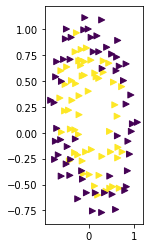

In [19]:
mydata = np.genfromtxt('mydata2.txt',delimiter=',',dtype=np.float32)
A = mydata[:,0:2]
B = mydata[:,-1].reshape(-1,1)  # mydata[:,2:3]
plt.subplot(131)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker=">")


#A = (A-np.mean(A,0))/np.std(A,0)
AA=np.insert(A,0,np.ones(A.shape[0]),axis=1)

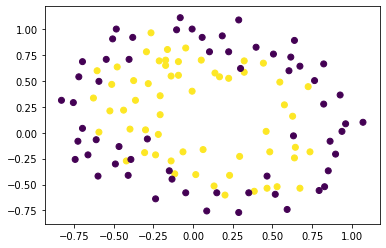

In [20]:
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker="o")

In [21]:
df=pd.DataFrame(data=mydata,columns=['x','y','c'])
df.head(5)

,x,y,c
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,0.183760,0.93348,0.0
3,0.224080,0.77997,0.0
4,-0.213710,0.69225,1.0


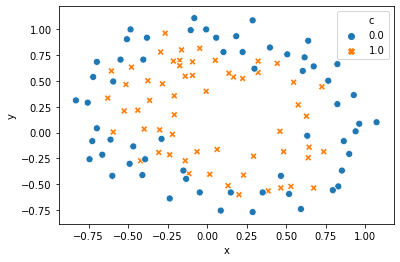

In [17]:
sns.scatterplot(x='x', 
                y='y', 
                hue='c', # different colors by group
                style='c', # different shapes by group
                s=50, # marker size
                data=df)




0 Cost:  0.7032058
1000 Cost:  0.38596028
2000 Cost:  0.35277954
3000 Cost:  0.34842536
4000 Cost:  0.34811085
5000 Cost:  0.3481053
6000 Cost:  0.34810528
7000 Cost:  0.34810534
8000 Cost:  0.3481053
9000 Cost:  0.34810528
10000 Cost:  0.34810528
11000 Cost:  0.3481053
12000 Cost:  0.34810528
13000 Cost:  0.34810528
14000 Cost:  0.34810528
15000 Cost:  0.34810534
16000 Cost:  0.3481053
17000 Cost:  0.34810534
18000 Cost:  0.34810534
19000 Cost:  0.34810528
Cost:  0.34810534
Accuracy:  0.8559322033898306


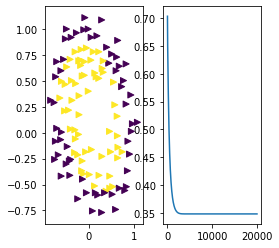

In [26]:
def LogisticRegression2():   
    # data feature를 추가
    
    AA = [[x[0],x[1],x[0]**2,x[0]*x[1],x[1]**2] for x in A]
    #AA = [[x[0],x[1],x[0]**2,x[0]*x[1],x[1]**2,x[0]**3,x[0]**2*x[1],x[0]*x[1]**2,x[1]**3] for x in A]
    X = tf.placeholder(tf.float32, shape=[None, 5])
    Y = tf.placeholder(tf.float32, shape=[None, 1])    
    
    logits = tf.layers.dense(X,units=1,activation=None)
    hypothesis = tf.nn.sigmoid(logits)
    
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *tf.log(1 - hypothesis))
    #cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-2)
    train = optimizer.minimize(cost)    
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    
    total_cost = []
    for step in range(20000):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: AA, Y: B})
        total_cost.append(cost_val)
        if step % 1000 == 0:
            print(step, "Cost: ", cost_val)
            


    print("Cost: ", sess.run(cost,feed_dict={X: AA, Y: B}))
    prediction = sess.run(hypothesis,feed_dict={X: AA}) >= 0.5
    acc = np.mean(1*(prediction==B))
    print("Accuracy: ", acc)
    
    
    plt.subplot(132)
    plt.scatter(A[:, 0], A[:, 1], c=prediction.flatten(),marker=">")
    plt.subplot(133)
    plt.plot(total_cost)

    plt.show()
    
    return prediction
    
prediction = LogisticRegression2()

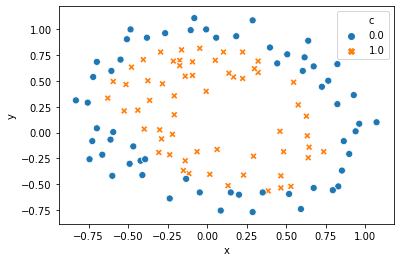

In [35]:
result = np.concatenate([mydata[:,0:2], prediction.astype(np.int)],axis=1)
df2=pd.DataFrame(data=result,columns=['x','y','c'])
sns.scatterplot(x='x', 
                y='y', 
                hue='c', # different colors by group
                style='c', # different shapes by group
                s=50, # marker size
                data=df2)

In [40]:
AA = [[x[0],x[1],x[0]**2,x[0]*x[1],x[1]**2] for x in A]
df=pd.DataFrame(data=AA,columns=['x','y','x^2','xy','y^2'])
df.head(5)

,x,y,x^2,xy,y^2
0,0.051267,0.69956,0.002628,0.035864,0.489384
1,-0.092742,0.68494,0.008601,-0.063523,0.469143
2,0.183760,0.93348,0.033768,0.171536,0.871385
3,0.224080,0.77997,0.050212,0.174776,0.608353
4,-0.213710,0.69225,0.045672,-0.147941,0.479210


In [38]:
AA[0]

[0.051267, 0.69956, 0.002628305471293904, 0.035864342, 0.48938417483967456]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
0 Cost:  0.6781288
1000 Cost:  0.32114372
2000 Cost:  0.32102653
3000 Cost:  0.3210399
4000 Cost:  0.32106826
5000 Cost:  0.32109463
6000 Cost:  0.3210415
7000 Cost:  0.32104784
8000 Cost:  0.3210448
9000 Cost:  0.3210311
10000 Cost:  0.32101792
11000 Cost:  0.32102966
12000 Cost:  0.32105437
13000 Cost:  0.32099867
14000 Cost:  0.32101494
15000 Cost:  0.3210582
16000 Cost:  0.32104144
17000 Cost:  0.32102484
18000 Cost:  0.32102677
19000 Cost:  0.32101452
Cost:  0.32102576
Accuracy:  0.8389830508474576


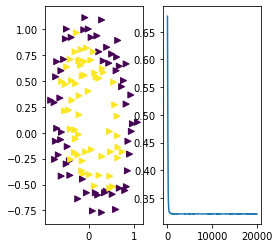

In [41]:
def LogisticRegression3():   
    # deep net
    
    X = tf.placeholder(tf.float32, shape=[None, 2])
    Y = tf.placeholder(tf.float32, shape=[None, 1])    
    
    x1 = tf.layers.dense(X,units=10,activation=tf.nn.relu)  # units=200 으로 하면 acc = 1.0
    logits = tf.layers.dense(x1,units=1,activation=None)
   
    hypothesis = tf.nn.sigmoid(logits)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=logits))
    
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-2)
    train = optimizer.minimize(cost)    
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    
    total_cost = []
    for step in range(20000):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X: A, Y: B})
        total_cost.append(cost_val)
        if step % 1000 == 0:
            print(step, "Cost: ", cost_val)
            


    print("Cost: ", sess.run(cost,feed_dict={X: A, Y: B}))
    prediction = sess.run(hypothesis,feed_dict={X: A}) >= 0.5
    acc = np.mean(1*(prediction==B))
    print("Accuracy: ", acc)
    
    
    plt.subplot(132)
    plt.scatter(A[:, 0], A[:, 1], c=prediction.flatten(),marker=">")
    plt.subplot(133)
    plt.plot(total_cost)

    plt.show()
    return prediction

prediction = LogisticRegression3()

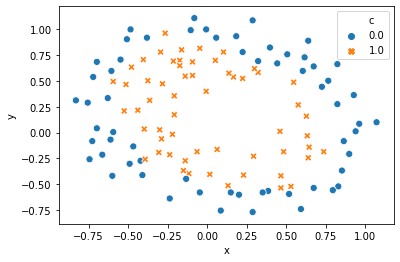

In [42]:
result = np.concatenate([mydata[:,0:2], prediction.astype(np.int)],axis=1)
df2=pd.DataFrame(data=result,columns=['x','y','c'])
sns.scatterplot(x='x', 
                y='y', 
                hue='c', # different colors by group
                style='c', # different shapes by group
                s=50, # marker size
                data=df2)